In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from skfuzzy import cmeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv("Produksi Tanaman Pangan Kab Lombok Utara.csv")
data

,Kecamatan,Padi Sawah,Padi Ladang,Total Padi,Jagung,Ubi Kayu,Ubi Jalar,Kacang Tanah,Kedelai,Kacang Hijau
0,Pemenang,3093.90,0.00,3093.90,33.38,169.72,0.00,319.10,0,0
1,Tanjung,8898.74,0.00,8898.74,103.77,3715.53,298.91,540.67,0,0
2,Gangga,10431.57,0.00,10431.57,23.03,2745.37,0.00,1821.97,0,0
3,Kayangan,15019.46,1244.24,16263.70,9081.70,4653.08,674.89,3818.64,0,0
4,Bayan,28199.08,4874.10,33073.18,25173.98,10034.70,228.53,6622.28,0,0
5,Lombok Utara,65642.75,6118.34,71761.09,34415.86,21318.40,1202.33,13122.66,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kecamatan     6 non-null      object 
 1   Padi Sawah    6 non-null      float64
 2   Padi Ladang   6 non-null      float64
 3   Total Padi    6 non-null      float64
 4   Jagung        6 non-null      float64
 5   Ubi Kayu      6 non-null      float64
 6   Ubi Jalar     6 non-null      float64
 7   Kacang Tanah  6 non-null      float64
 8   Kedelai       6 non-null      int64  
 9   Kacang Hijau  6 non-null      int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 608.0+ bytes


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Padi Sawah,6.0,21880.916667,23042.019345,3093.90,9281.9475,12725.515,24904.175,65642.75
Padi Ladang,6.0,2039.446667,2748.927504,0.00,0.0000,622.120,3966.635,6118.34
Total Padi,6.0,23920.363333,25583.088017,3093.90,9281.9475,13347.635,28870.810,71761.09
Jagung,6.0,11471.953333,14906.616629,23.03,50.9775,4592.735,21150.910,34415.86
Ubi Kayu,6.0,7106.133333,7683.863285,169.72,2987.9100,4184.305,8689.295,21318.40
Ubi Jalar,6.0,400.776667,464.524589,0.00,57.1325,263.720,580.895,1202.33
Kacang Tanah,6.0,4374.220000,4889.820635,319.10,860.9950,2820.305,5921.370,13122.66
Kedelai,6.0,0.000000,0.000000,0.00,0.0000,0.000,0.000,0.00
Kacang Hijau,6.0,0.000000,0.000000,0.00,0.0000,0.000,0.000,0.00


Matriks Correlation : Nilai absolut korelasi mendekati 1 menunjukkan hubungan yang kuat antara dua variabel, sedangkan nilai yang mendekati 0 

C:\Users\User\AppData\Local\Temp\ipykernel_7616\4108190309.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


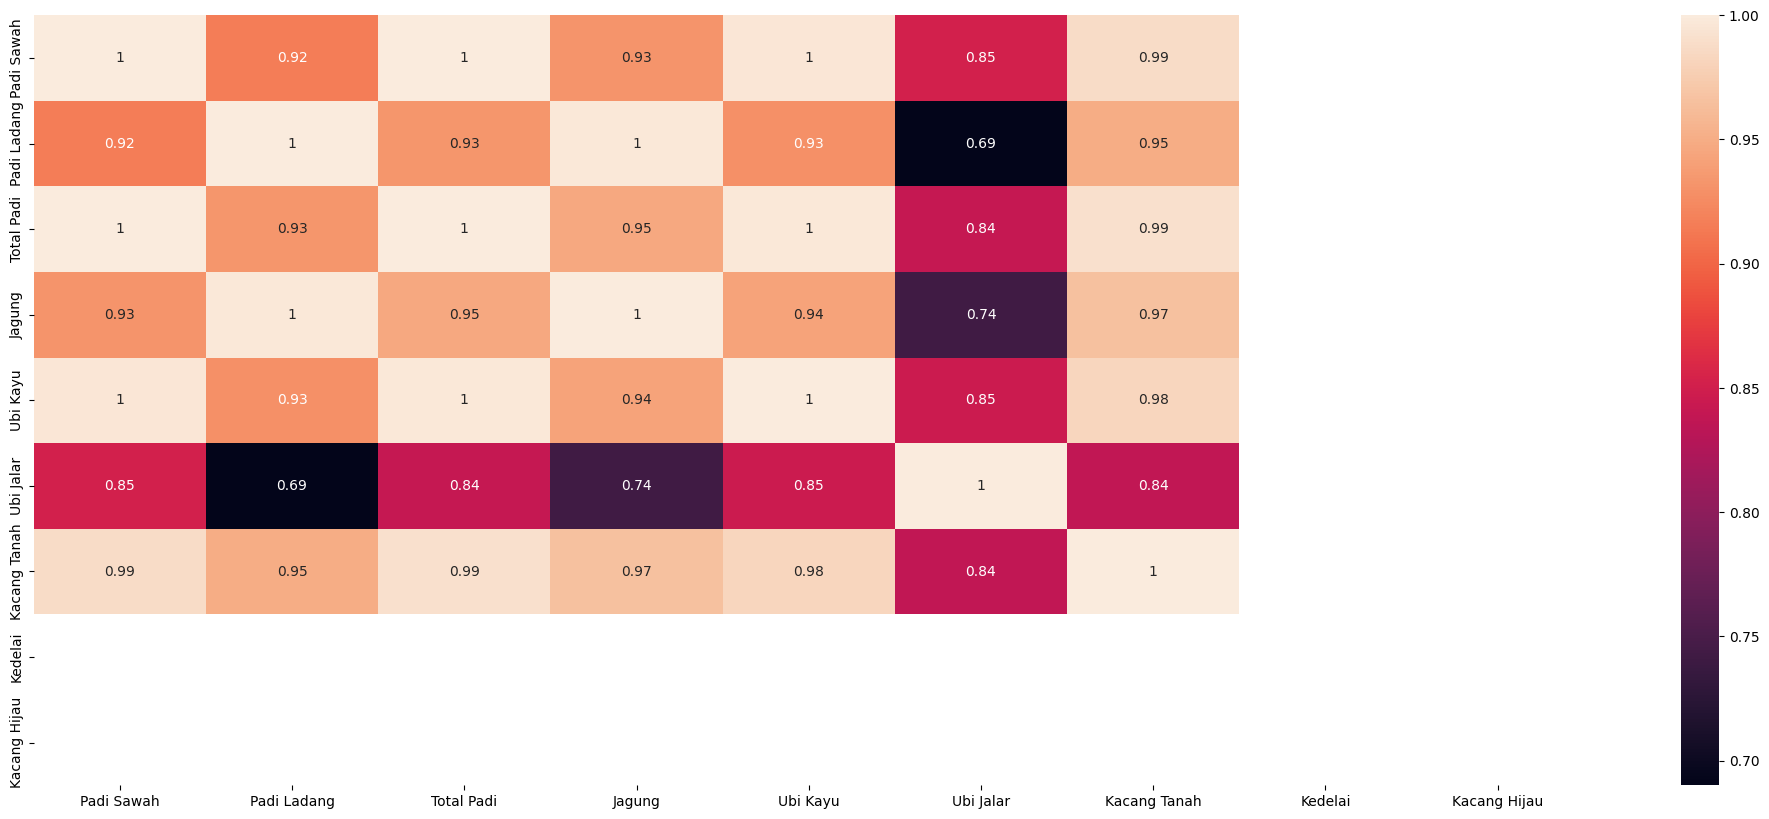

In [5]:
plt.figure(figsize=(25, 10))
cor = data.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [6]:
# normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.iloc[:,1:])

normalisasi data dengan StandardScaler dilakukan untuk memastikan bahwa semua fitur memiliki skala yang serupa, sehingga dapat menghasilkan hasil clustering yang lebih baik dan lebih akurat

In [7]:
# Set the seed of the random number generator
np.random.seed(42)

# Compute variance of each attribute
variances = np.var(scaled_data, axis=0)

# Select the 9 features with highest 
selected_features = np.argsort(variances)[::2][:9]

# Select the corresponding features from the data
selected_data = data.iloc[:,selected_features]

# normalize data
scaler = StandardScaler()
scaled_new_data = scaler.fit_transform(selected_data.iloc[:,2:])

In [8]:
selected_data.columns

Index(['Kacang Tanah', 'Kecamatan', 'Total Padi', 'Ubi Kayu', 'Padi Sawah'], dtype='object')

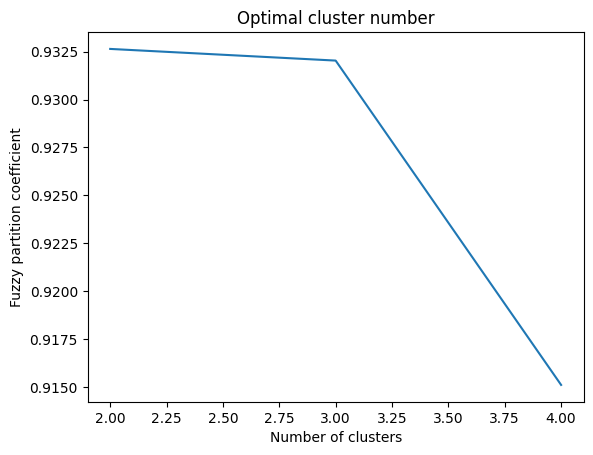

In [106]:
cluster_range = range(2, 5)

# Compute the c-means clustering for each cluster number
fpcs = []
for n_cluster in cluster_range:
    cntr, u, u0, d, jm, p, fpc = cmeans(
        scaled_new_data.T, n_cluster, 2, error=0.005, maxiter=1000, seed=42)
    fpcs.append(fpc)

# Plot the fuzzy partition coefficient (FPC) values against the number of clusters
fig, ax = plt.subplots()
ax.plot(cluster_range, fpcs)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Fuzzy partition coefficient')
ax.set_title('Optimal cluster number')
plt.show()


FPC didefinisikan pada rentang dari 0 hingga 1, dengan 1 adalah yang terbaik

In [107]:
# create function to make model
def distance(x, c, m):
    # Compute Euclidean distance between x and c
    return np.linalg.norm(x - c) ** 2


def update_centers(X, U, m):
    # Update cluster centers using PCM algorithm
    n_clusters = U.shape[0]
    n_samples = X.shape[0]
    n_features = X.shape[1]
    C = np.zeros((n_clusters, n_features))
    for k in range(n_clusters):
        ukm = U[k] ** m
        C[k] = np.sum(ukm.reshape(-1, 1) * X, axis=0) / np.sum(ukm)
    return C


def update_membership(X, C, m, alpha):
    # Update membership matrix using PCM algorithm
    n_clusters = C.shape[0]
    n_samples = X.shape[0]
    U = np.zeros((n_clusters, n_samples))
    for i in range(n_samples):
        d = np.zeros(n_clusters)
        for k in range(n_clusters):
            d[k] = distance(X[i], C[k], m)
        u = (1 + (d / alpha) ** (2 / (m - 1))) ** (-1)
        U[:, i] = u / np.sum(u)
    return U


def pcm(X, n_clusters, m=2, alpha=1, max_iter=100, tol=1e-4):
    # Initialize cluster centers and membership matrix
    n_samples = X.shape[0]
    C = X[np.random.choice(n_samples, n_clusters)]
    U = np.random.rand(n_clusters, n_samples)
    U /= np.sum(U, axis=0)

    # Run PCM algorithm
    for i in range(max_iter):
        U_prev = U.copy()
        C = update_centers(X, U, m)
        U = update_membership(X, C, m, alpha)
        if np.linalg.norm(U - U_prev) < tol:
            break

    return C, U


In [117]:
n_clusters = 2
C, U = pcm(scaled_new_data, n_clusters)

# get cluster max
cluster_membership = np.argmax(U, axis=0)

# get cluster center
cluster_center = C

# create dataframe for cluster related to column namme data[selected_features] using the index of data
selected_features_name = data.columns[selected_features]
kecamatan = data.iloc[:, 0]
kecamatan_cluster = pd.DataFrame(
    {'Kecamatan': kecamatan, 'Cluster': cluster_membership})
kecamatan_cluster


,Kecamatan,Cluster
0,Pemenang,1
1,Tanjung,1
2,Gangga,1
3,Kayangan,1
4,Bayan,1
5,Lombok Utara,0


In [10]:
selected_features


array([7, 0, 3, 5, 1], dtype=int64)

In [118]:
pca = PCA(n_components=2)
pca.fit(scaled_new_data)
pca_data = pca.transform(scaled_new_data)

# get row name of region from pca data and cluster
pcm_pca_data_kecamatan = pd.DataFrame(
    {'Kecamatan': kecamatan, 'PCA1': pca_data[:, 0], 'PCA2': pca_data[:, 1], 'Cluster': cluster_membership})
pcm_pca_data_kecamatan


,Kecamatan,PCA1,PCA2,Cluster
0,Pemenang,-1.601427,-0.078378,1
1,Tanjung,-1.006827,0.115427,1
2,Gangga,-1.006640,-0.052943,1
3,Kayangan,-0.579520,-0.018735,1
4,Bayan,0.640725,0.067461,1
5,Lombok Utara,3.553688,-0.032833,0


Dalam hal ini, nilai PCA1 dan PCA2 untuk kecamatan tersebut (-1.601427 dan -0.078378) menggambarkan posisi relatif kecamatan dalam ruang 2 dimensi yang dibentuk oleh komponen utama tersebut. Secara visual, nilai ini dapat diinterpretasikan sebagai koordinat titik pada sumbu PCA1 dan PCA2 dalam representasi baru tersebut.

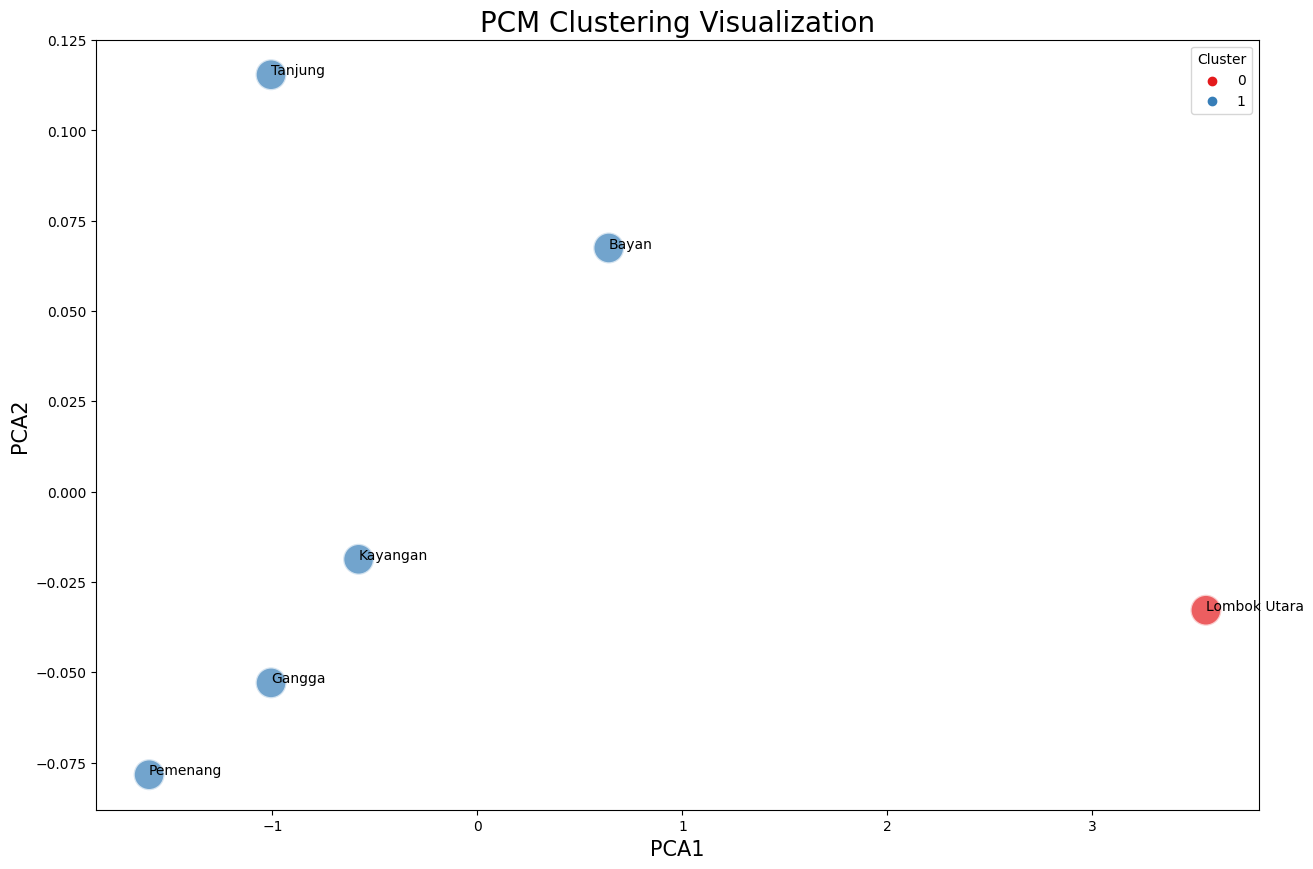

In [120]:
# visualize the data and give annotation for each point based on the region
plt.figure(figsize=(15, 10))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pcm_pca_data_kecamatan,
                palette='Set1', s=500, legend='full', alpha=0.7)
for i, txt in enumerate(pcm_pca_data_kecamatan.Kecamatan):
    plt.annotate(
        txt, (pcm_pca_data_kecamatan.PCA1[i], pcm_pca_data_kecamatan.PCA2[i]))
plt.title('PCM Clustering Visualization', fontsize=20)
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)
plt.show()


In [126]:
# show the performance of the model
from sklearn.metrics import silhouette_score
silhouette_score(scaled_new_data, cluster_membership)
print("Silhouette Score :", silhouette_score(scaled_new_data, cluster_membership))


Silhouette Score : 0.6161884659227513
